In [30]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# reading csv file and converting to tensor
data = pd.read_csv(r'/Users/freddy/Desktop/CSV_FILES/Student_info_1.csv')
data

,Roll no,Cpi
0,1,0.3400
1,2,0.4500
2,3,0.6530
3,4,0.6540
4,5,0.8670
5,6,0.4574
6,7,0.3594
7,8,0.4598
8,9,0.4350
9,10,0.5600


In [32]:
data = data.values
data

array([[ 1.    ,  0.34  ],
       [ 2.    ,  0.45  ],
       [ 3.    ,  0.653 ],
       [ 4.    ,  0.654 ],
       [ 5.    ,  0.867 ],
       [ 6.    ,  0.4574],
       [ 7.    ,  0.3594],
       [ 8.    ,  0.4598],
       [ 9.    ,  0.435 ],
       [10.    ,  0.56  ],
       [11.    ,  0.67  ],
       [12.    ,  0.76  ],
       [13.    ,  0.98  ],
       [14.    ,  0.87  ],
       [15.    ,  0.998 ],
       [16.    ,  0.934 ],
       [17.    ,  0.934 ],
       [18.    ,  0.923 ],
       [19.    ,  0.923 ],
       [20.    ,  0.947 ]])

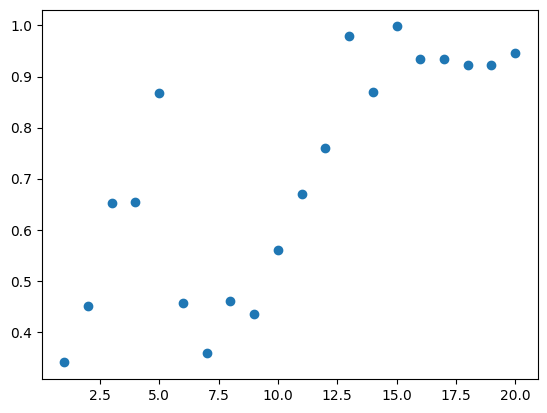

In [33]:
x_data = data[:,0:1]
y_data = data[:,1:2]
x_train = torch.from_numpy(x_data)
y_train = torch.from_numpy(y_data)
plt.scatter(x_train,y_train)
plt.show()

In [34]:
# intializing weight and bias
w = torch.randn((x_train.size()[1],1),requires_grad=True,dtype=float)
b = torch.randn(1,requires_grad=True,dtype=float)
print(w,b)

tensor([[0.7686]], dtype=torch.float64, requires_grad=True) tensor([-1.6370], dtype=torch.float64, requires_grad=True)


In [35]:
# model
def lin_reg_model(x_train,weight,bias):
  return (x_train @ weight.t()) + bias

In [36]:
# loss fun
def mse(y_pred,y_train):
  diff = y_pred-y_train
  return torch.sum(diff*diff)/diff.numel()

In [37]:
# prediction and loss
y_pred = lin_reg_model(x_train,w,b)
loss = mse(y_pred,y_train)
print(loss)

tensor(50.9139, dtype=torch.float64, grad_fn=<DivBackward0>)


In [47]:
# gradient decent function
def gradient_descent(x,y):
    m_curr=w
    b_curr=b
    n = len(x)
    learning_rate=0.005
    iterations=10000
    for i in range(iterations):
        y_pred = m_curr*x + b_curr
        cost = (1/n)*sum(v**2 for v in (y-y_pred))
        md = -(2/n)*sum(x*(y-y_pred))
        bd = -(2/n)*sum(y-y_pred)
        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*bd
        
        if(i%1000==0):
            print("m {}, b {}, cost {}, iterations {}".format(m_curr,b_curr,cost,i))
            y_pred=y_pred.detach().numpy()
            plt.scatter(x_train,y_train)
            plt.plot(x_train,y_pred)
            plt.show()

m tensor([[-0.0780]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([-1.6943], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([50.9139], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 0


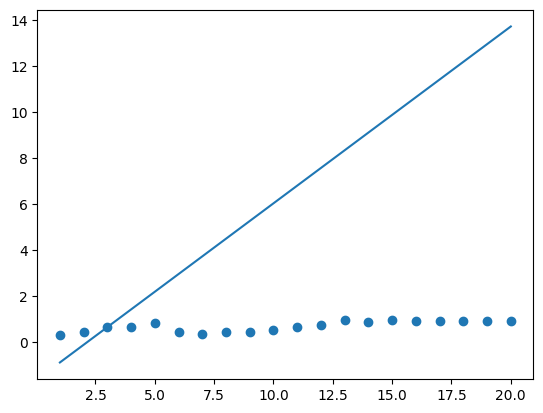

m tensor([[0.0452]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.1862], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0304], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 1000


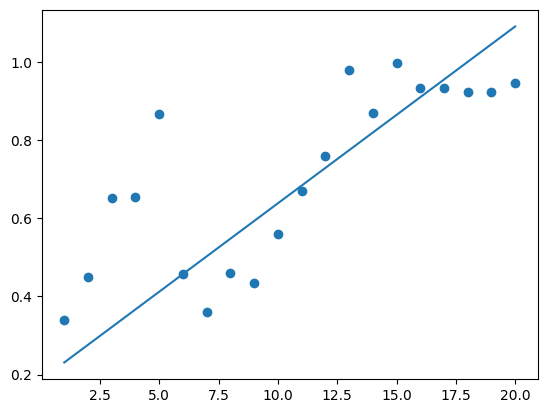

m tensor([[0.0317]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.3715], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0206], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 2000


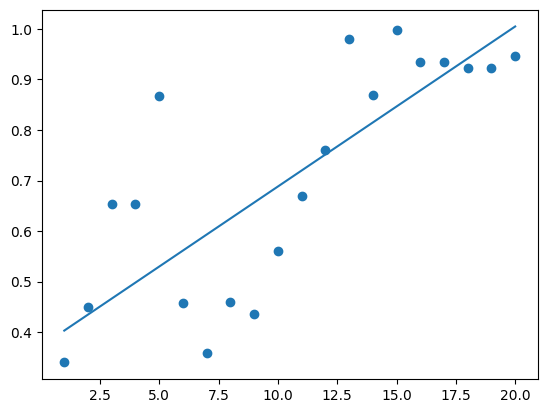

m tensor([[0.0303]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.3899], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0205], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 3000


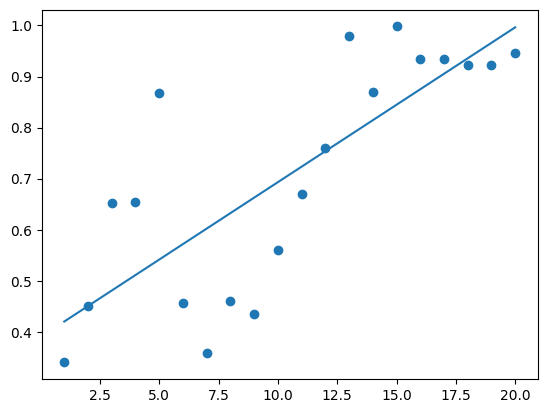

m tensor([[0.0302]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.3917], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0205], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 4000


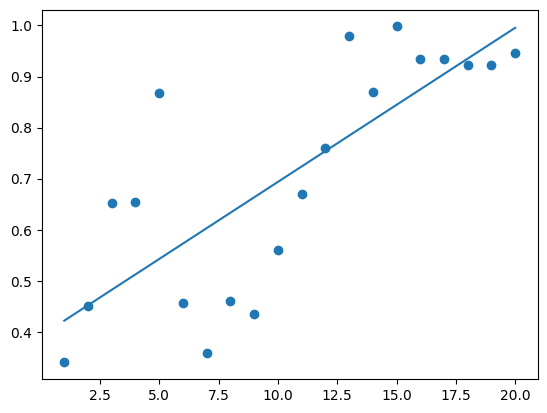

m tensor([[0.0302]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.3919], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0205], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 5000


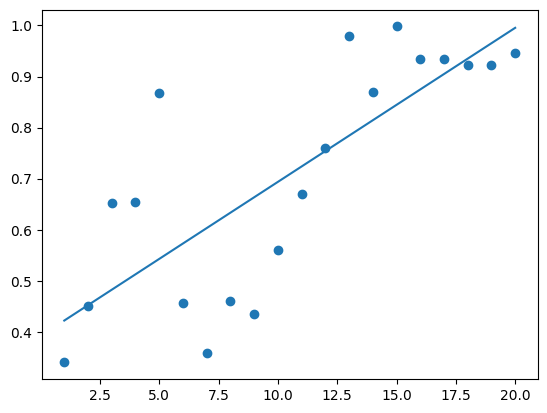

m tensor([[0.0302]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.3919], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0205], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 6000


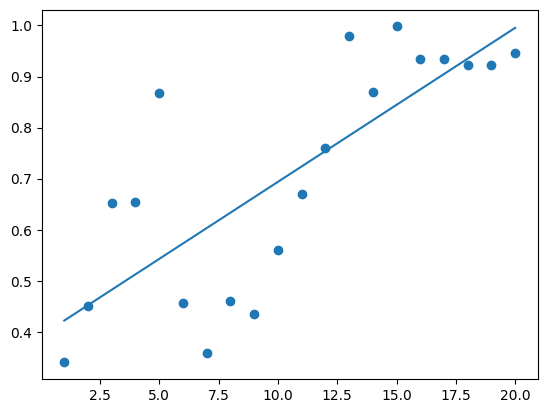

m tensor([[0.0302]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.3919], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0205], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 7000


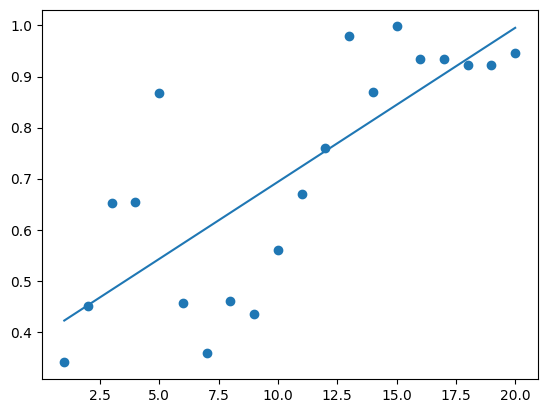

m tensor([[0.0302]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.3919], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0205], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 8000


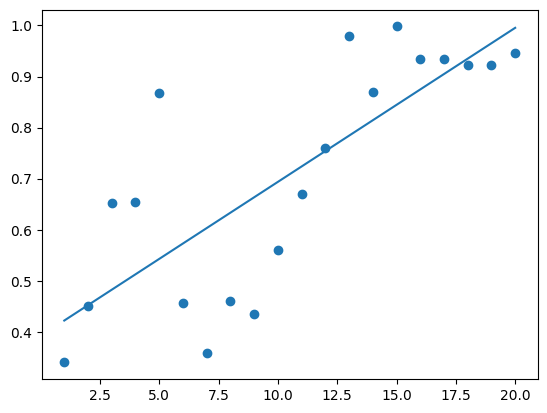

m tensor([[0.0302]], dtype=torch.float64, grad_fn=<SubBackward0>), b tensor([0.3919], dtype=torch.float64, grad_fn=<SubBackward0>), cost tensor([0.0205], dtype=torch.float64, grad_fn=<MulBackward0>), iterations 9000


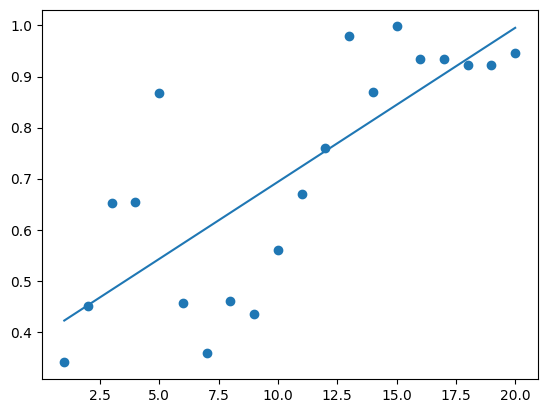

In [48]:
gradient_descent(x_train, y_train)

tensor(50.9139, dtype=torch.float64, grad_fn=<DivBackward0>)


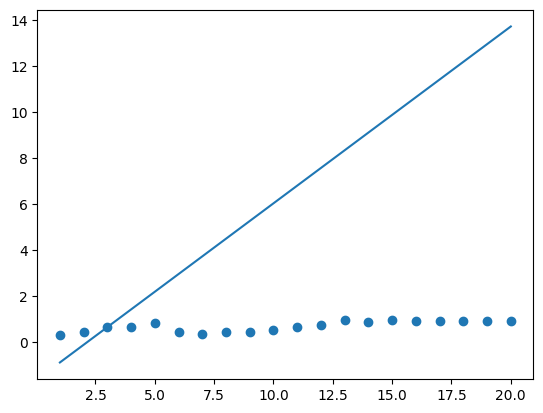

tensor(0.0304, dtype=torch.float64, grad_fn=<DivBackward0>)


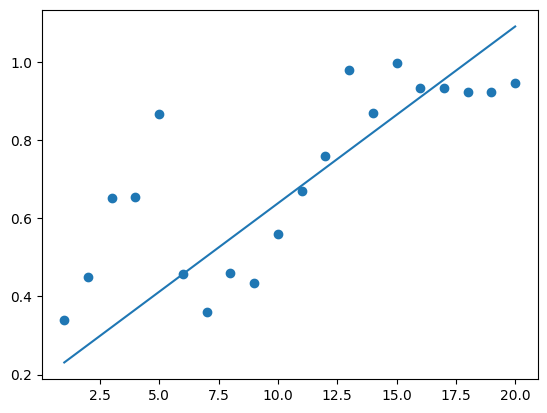

tensor(0.0206, dtype=torch.float64, grad_fn=<DivBackward0>)


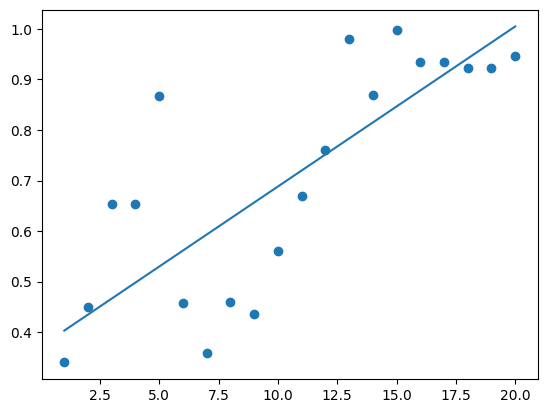

tensor(0.0205, dtype=torch.float64, grad_fn=<DivBackward0>)


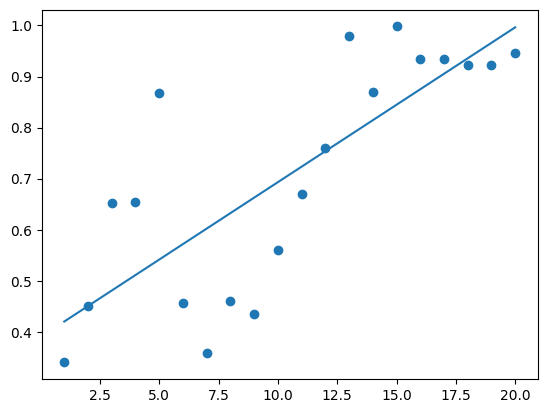

tensor(0.0205, dtype=torch.float64, grad_fn=<DivBackward0>)


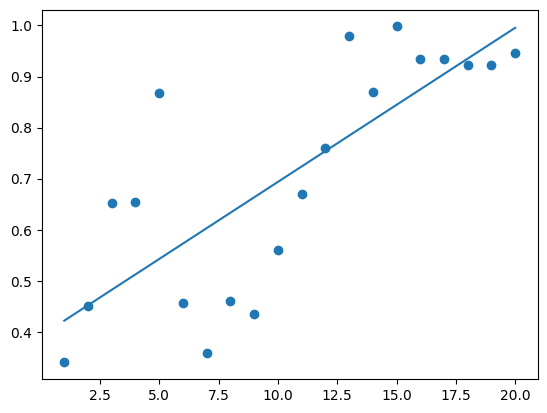

tensor(0.0205, dtype=torch.float64, grad_fn=<DivBackward0>)


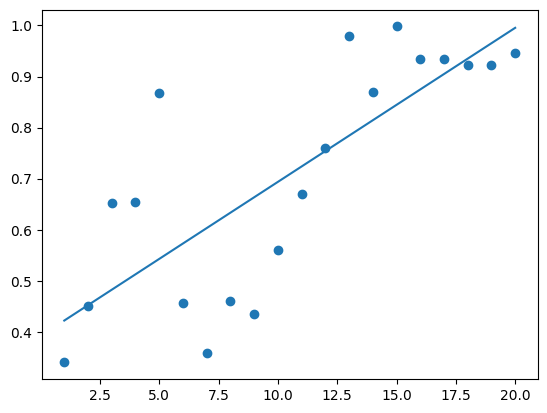

tensor(0.0205, dtype=torch.float64, grad_fn=<DivBackward0>)


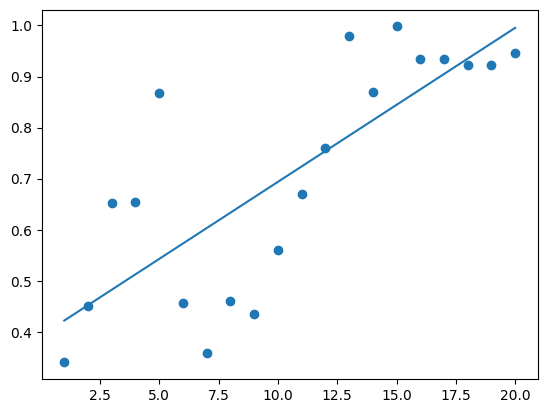

tensor(0.0205, dtype=torch.float64, grad_fn=<DivBackward0>)


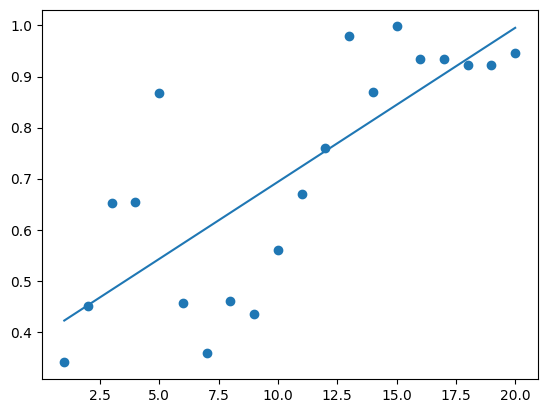

tensor(0.0205, dtype=torch.float64, grad_fn=<DivBackward0>)


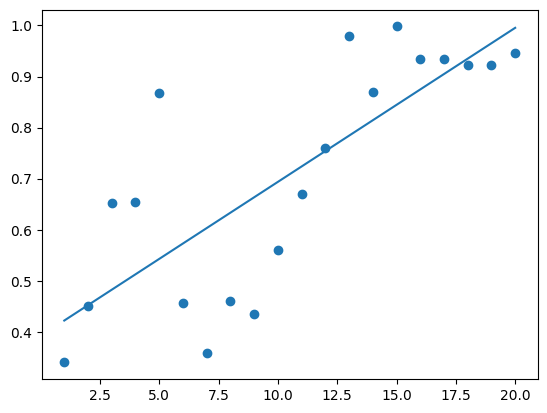

tensor(0.0205, dtype=torch.float64, grad_fn=<DivBackward0>)


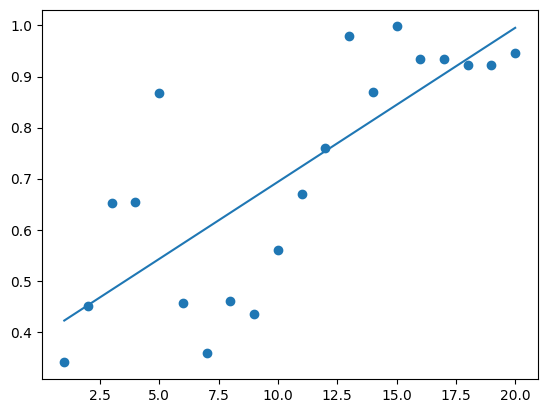

In [49]:
# gradient decent
times = 10000
learning_rate=0.005

for i in range(times):
  y_pred = lin_reg_model(x_train,w,b)
  loss = mse(y_pred,y_train)

  loss.backward()
  w_grad = w.grad
  b_grad = b.grad

  with torch.no_grad():
    # update weights
    w -= torch.mul(learning_rate,w_grad)
    b -= torch.mul(learning_rate,b_grad)
    
    
    # zero out gradients
    w.grad.zero_()
    b.grad.zero_()

  if(i%1000==0):
    print(loss)
    y=y_pred
    y=y.detach().numpy()
    plt.scatter(x_train,y_train)
    plt.plot(x_train,y)
    plt.show()

In [50]:
w,b

(tensor([[0.0302]], dtype=torch.float64, requires_grad=True),
 tensor([0.3919], dtype=torch.float64, requires_grad=True))

In [51]:
y_pred

tensor([[0.4221],
        [0.4523],
        [0.4825],
        [0.5126],
        [0.5428],
        [0.5730],
        [0.6031],
        [0.6333],
        [0.6635],
        [0.6936],
        [0.7238],
        [0.7540],
        [0.7842],
        [0.8143],
        [0.8445],
        [0.8747],
        [0.9048],
        [0.9350],
        [0.9652],
        [0.9953]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [11]:
# using sklearn
from sklearn import linear_model

In [12]:
# reading csv file and converting to tensor
data = pd.read_csv(r'/Users/freddy/Desktop/CSV_FILES/Student_info_1.csv')
data

,Roll no,Cpi
0,1,0.3400
1,2,0.4500
2,3,0.6530
3,4,0.6540
4,5,0.8670
5,6,0.4574
6,7,0.3594
7,8,0.4598
8,9,0.4350
9,10,0.5600


In [13]:
data = data.values
data

array([[ 1.    ,  0.34  ],
       [ 2.    ,  0.45  ],
       [ 3.    ,  0.653 ],
       [ 4.    ,  0.654 ],
       [ 5.    ,  0.867 ],
       [ 6.    ,  0.4574],
       [ 7.    ,  0.3594],
       [ 8.    ,  0.4598],
       [ 9.    ,  0.435 ],
       [10.    ,  0.56  ],
       [11.    ,  0.67  ],
       [12.    ,  0.76  ],
       [13.    ,  0.98  ],
       [14.    ,  0.87  ],
       [15.    ,  0.998 ],
       [16.    ,  0.934 ],
       [17.    ,  0.934 ],
       [18.    ,  0.923 ],
       [19.    ,  0.923 ],
       [20.    ,  0.947 ]])

In [14]:
x_train=data[:,0:1]
y_train=data[:,1:2]
reg = linear_model.LinearRegression()

In [15]:
reg.fit(x_train,y_train)
print(x_train.shape,y_train.shape)

(20, 1) (20, 1)


In [16]:
reg.predict(np.array([6.5]).reshape(1, 1)) # value matches

array([[0.5880485]])

In [17]:
print("coef = ",reg.coef_)
print("inte = ",reg.intercept_)

coef =  [[0.03017038]]
inte =  [0.39194105]
